#Making the Image Recognition Model 

This notebook is a continuation of **Experiment 2(a): ResNet50**. 

After my experimentation in the previous notebook, I realized that a major segment that I had ignored was how would the model classify `silence` or `unknown` clips. 

To resolve the issue, I decided that working with a Sigmoid classifier would be my best bet. Since, simoid outputs only the likeliness of a particular object without having an object remain inside a grand summation of 1, it will give me the honest likelyhood of each object in the dataset. 

The dataset created for Spectogram, Mel Spectogram and MFCC will be utilized in training our classifier here. 

The notebook is divided into five segments:
1.  Getting Started
1.   Spectogram
2.   Mel-Spectogram
3.   MFCC Spectogram
4.   Putting it all together



#Getting Started

In this section of the notebook, I will be discussing the various libraries required, getting the all the files from the training dataset and the common functionalities developed for the later models. 



##Downloading Libraries Required

In [ ]:
!pip install -Uqq fastbook 
import fastbook 
fastbook.setup_book() 

     |████████████████████████████████| 727kB 7.4MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
     |████████████████████████████████| 1.2MB 15.3MB/s 
     |████████████████████████████████| 194kB 34.3MB/s 
     |████████████████████████████████| 51kB 7.5MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
     |████████████████████████████████| 12.8MB 10.5MB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


##Importing Libraries

In [ ]:
from fastbook import *
from fastai.vision.all import *
from google.colab import drive
from sklearn.metrics import confusion_matrix
import seaborn as sns
from google.colab import files
import pandas as pd
import os
import gc
from fastai.vision import models

We collect all the garbage values.

#Get Data 


Since the dataset is in the google drive, we will unzip it to our temporary drive in colab. 

In [ ]:
%%bash 
unzip /content/gdrive/MyDrive/SpeechRecognition/spectogram.zip
unzip /content/gdrive/MyDrive/SpeechRecognition/mfcc.zip
unzip /content/gdrive/MyDrive/SpeechRecognition/mel_spectogram.zip

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



#Look at the Dataset!

Since, the name for all the test and train files are the same, we can create a common list for all examples, train set, validation set, and test set. 

The function below, `total_values`, is used to get all the relative paths of each file and the number of categories. 

`total_files`: The variable holds the relative path of each file i.e.  `parent_file_name/file_name.jpg` 
`cats`: The variable holds the different catergorical names. 

In [ ]:
def total_values(train_audio):
  sum, cats = 0, os.listdir(train_audio)
  print(f'Total number of categories is {len(cats)-1}')

  audio = []

  for cat in cats:
    if cat != '_background_noise_':
      pth = os.path.join(train_audio, cat)
      files = [os.path.join(cat, f) for f in os.listdir(pth)]
      audio.append(files)
      numbs = len(files)
      print(cat, numbs)
      sum += numbs

  print(f'Total number of examples are {sum}')

  return cats, [j for cat in audio for j in cat]
cats, total_files = total_values('/content/spec/train_images')

Total number of categories is 30
one 2370
three 2356
stop 2380
seven 2377
marvin 1746
four 2372
wow 1745
house 1750
five 2357
right 2367
bird 1731
tree 1733
down 2359
off 2357
cat 1733
happy 1742
eight 2352
go 2372
on 2367
nine 2364
six 2369
sheila 1734
zero 2376
bed 1713
left 2353
yes 2377
up 2375
dog 1746
no 2375
two 2373
Total number of examples are 64721


Since, there are 64,721 training examples, we use the assert function to check if we have all the file names in our variable `total_files`.

In [ ]:
assert 64721==len(total_files) 

#Split the Dataset

##Upload Test and Validation List

In [ ]:
files.upload()

Saving testing_list.txt to testing_list.txt
Saving validation_list.txt to validation_list.txt


{'testing_list.txt': b'bed/0c40e715_nohash_0.wav\nbed/0ea0e2f4_nohash_0.wav\nbed/0ea0e2f4_nohash_1.wav\nbed/105a0eea_nohash_0.wav\nbed/1528225c_nohash_0.wav\nbed/1528225c_nohash_1.wav\nbed/1528225c_nohash_2.wav\nbed/1528225c_nohash_3.wav\nbed/1b4c9b89_nohash_0.wav\nbed/1cb788bc_nohash_0.wav\nbed/1cb788bc_nohash_1.wav\nbed/20d3f11f_nohash_0.wav\nbed/210f3aa9_nohash_0.wav\nbed/2796ac50_nohash_0.wav\nbed/283d7a53_nohash_0.wav\nbed/28497c5b_nohash_0.wav\nbed/2c6d3924_nohash_0.wav\nbed/2d82a556_nohash_0.wav\nbed/2d82a556_nohash_1.wav\nbed/370844f7_nohash_0.wav\nbed/37dca74f_nohash_0.wav\nbed/3df9a3d4_nohash_0.wav\nbed/3df9a3d4_nohash_1.wav\nbed/3f170018_nohash_0.wav\nbed/3f2b358d_nohash_0.wav\nbed/3ff840aa_nohash_0.wav\nbed/3ff840aa_nohash_1.wav\nbed/422d3197_nohash_0.wav\nbed/4290ca61_nohash_0.wav\nbed/43fc47a7_nohash_0.wav\nbed/44260689_nohash_0.wav\nbed/4620dc14_nohash_0.wav\nbed/47d01978_nohash_0.wav\nbed/4845bb10_nohash_0.wav\nbed/4c4d2526_nohash_0.wav\nbed/4c7c95de_nohash_0.wav\nbed/4

##Create Validation Set
Using the `validation_list.txt` provided by Kaggle, I form a list called `val` containing the relative paths of each file belonging to the validation set. 

In [ ]:
df = pd.read_csv('/content/validation_list.txt', header = None)
df[0] = df[0].apply(lambda x: f'{x[:-3]}jpg') 
val = df[0].values 

##Create Test Set
Using the `testing_list.txt` provided by Kaggle, I form a list called `test` containing the relative paths of each file belonging to the validation set. 

`true_test` is used to contain the string labels of all the test files. 

In [ ]:
df = pd.read_csv('/content/testing_list.txt', header = None)
df[0] = df[0].apply(lambda x: x[:-3]+'jpg') 
test = df[0].values 

true_test = [label_func(t)[0] for t in test] 

##Create Train Set
I determine the the `train` list by iterating through `total_files` and inputting files that are not in the concatenated list of test and validation lists. 

In [ ]:
train = [x for x in total_files if x not in [*test,*val]] 

In [ ]:
print(f'The length of the train set is {len(train)}') 
print(f'The length of the validation set is {len(val)}')
print(f'The length of the test set is {len(test)}') 

The length of the train set is 51088
The length of the validation set is 6798
The length of the test set is 6835


#Some Common Functions

Before we begin with the training, I am listing below the common functionalities that are repeated for each model. 

##Get Image Files

Through this function, I will be getting the paths for both Train and Validation dataset. 

I have specifically left out the Test set to have an unseen data that can be run to check the real accuracy of the model. 

In [ ]:
def get_image_files(path):
  files = [*train,*val]
  return [Path(path/f) for f in files]

##Get the Label
The label for each audio file is the parent folder it is kept in. However, the issue is how to obtain the name of that folder. 

By `label_func`, I make the process easier for obtaining the label of each audio file using the regular expression `r'([^/]+)/'`



In [ ]:
def label_func(fname):
  return re.findall(r'([^/]+)/', str(fname))[-1].split()

##Splitting the Dataset 
To test the accuracy of the model during training, I need a validation set. The model will only show the accuracy or error rate on this set. Furthermore, this reduces the chances of overfitting.  

By `split`, I will create two sets: train and validation set. The function returns `True` for all paths to the validation folder and `False` to the train set. 



In [ ]:
def split(fpath):
  return  fpath in validation

##Threshold

Since, the test set in Kaggle has various audio clips that contain white noise or unknown sounds, I need to determine a confidence level in the model. 

This is done by creating the function `thresh` which  will only keep the predictions with confidence levels higher than `n`. 

`preds_max` holds the confidence level of the for each prediction. 

In [ ]:
def thresh(n, pred):
  preds_thresh = []
  vals = [p > n for p in preds_max]
  for id, v in enumerate(vals):
    if v == True: 
      preds_thresh.append(pred[id])
    else: preds_thresh.append('silence')
  return preds_thresh

##Confusion Matrix

The `ConfusionMatrix` is a graphical representation of the function `confusion_matrix` by SKLearn on `pred` and `true` i.e. the predicted label and the actual label. 


In [ ]:
def ConfusionMatrix(pred, true):  
  matrix = confusion_matrix(pred, true)

  fig, ax = plt.subplots(figsize=(15, 15))
  ax= plt.subplot()
  sns.heatmap(matrix, annot=True, cmap='Blues',ax = ax, fmt='g');

  ax.set_xlabel('Predicted labels');
  ax.set_ylabel('True labels'); 
  ax.set_title('Confusion Matrix'); 
  ax.xaxis.set_ticklabels(dls_spec.vocab, Rotation = 45); 
  ax.yaxis.set_ticklabels(dls_spec.vocab, Rotation = 0);

##Decode Predictions

In [ ]:
def get_cats(pred): 
  cats = dls_spec.vocab
  return [cats[i] for i in pred]

##Get Accuracy 

In [ ]:
def acc(df): return ((df.Pred.values == labels_test).mean())

##Get DataFrame

Get DataFrame for train and validation dataset. 

In [ ]:
def predictions(learn):
  train_pred = learn.get_preds(0)
  val_pred = learn.get_preds(1)

  train_max, train_ind = torch.max(train_pred[0], dim = 1)
  val_max, val_ind = torch.max(val_pred[0], dim = 1)

  prob = [i.item() for i in [*train_max,*val_max]]
  ind = [i.item() for i in [*train_ind,*val_ind]]
  labels = labels_subset

  return pd.DataFrame(list(zip(prob,ind, labels)), columns = ['Prob','Pred','True'])

Get DataFrame for test dataset. 

In [ ]:
def pred_test(learn, dl): 
  test = learn.get_preds(dl = dl)
  preds_max, preds = torch.max(test[0], dim = 1)
  return pd.DataFrame(list(zip(preds_max.tolist(), preds.tolist(), labels_test)),  columns = ['Prob','Pred','True'])

#Spectogram Model 

We will first create a classifier to classify spectogram images into words. 

In [ ]:
path_spec = Path('/content/spec/train_images')
path_mel = Path('/content/mel_spec/train_images')
path_mfcc = Path('/content/mfcc/train_images')

##Check the Dataset


Let's check if all the training images are here! 

In [ ]:
cats = os.listdir(path)
sum = 0
for cat in cats: 
  sum+= len(os.listdir(path/cat))

assert sum==len(total_files)

Since, the `assert` fails to call an error, we can be assured that we have all the training examples required. 

##Create Image DataBunch 

Let's create the `validation` list which holds the absolute path to all the validation files. 

In [ ]:
validation = [path_spec/x for x in val]

We create the Data Generator using FastAI's Data Block function. 

The function is broadly classified into 5 parts: 

1.   `blocks`: Specify the blocks AKA dependent and independent variable. In our case the dependent variable is the categories, and independent variable is the images. 
In order to call the Binary Cross Entropy function, I label the independent variable as MultiCategoryBlock. 
2.   `get_items`: Through this we get the file paths in the training and validation dataset.
3.    `get_y`: We call `label_func` to get the labels for our images. 
4.    `splitter`: We split the dataset into train and validation by passing our `split` function to FastAI's `FuncSplitter`
5.    `item_tfms`: We standardize the size of each image to 224. Usually 224 works great to get accurate predictions without being too computationally expensive. 


In [ ]:
spec = DataBlock(blocks = (ImageBlock, MultiCategoryBlock), 
          get_items = get_image_files, 
          get_y = label_func, 
          splitter = FuncSplitter(split), 
          item_tfms=Resize(224))

We call the Data Generator `spec` to our desired path to get the train and validation dataloaders, `dls_spec`.

In [ ]:
dls_spec = spec.dataloaders(path_spec)  

The cell below will prove useful for getting the categories and encoded true values of train, test and validation set. 

In [ ]:
cats = list(dls_spec.vocab)
labels_subset = [cats.index(label_func(t)[0]) for t in [*train, *val]]
labels_test = [cats.index(t) for t in true_test]

We use `dls_spec` to create our `spec_test_dls` i.e our test dataloaders.

In [ ]:
spec_test_dls = dls_spec.test_dl([path_spec/t for t in test], with_labels=True) 

It should be noted that the learner takes dataloaders only, which is why our train, val and test set have been converted to the same. 

We then take a quick glance inside our `dls_spec` to check if everything is working correctly!

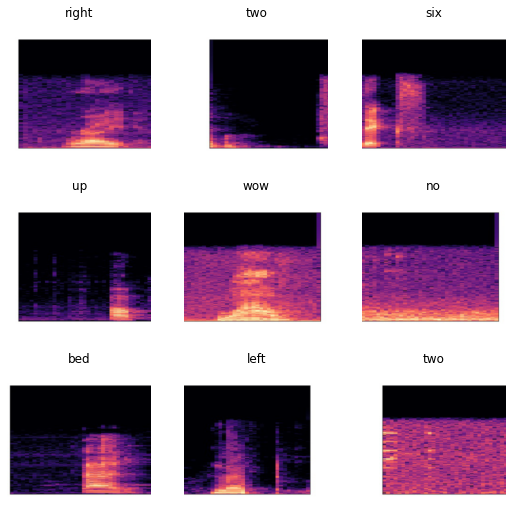

In [ ]:
dls_spec.show_batch()

##Train the Dataset! 

We pass a pretrained DenseNet121 architecture on ImageNet and `dls_spec` to our `cnn_learner` with the metrics set up for `accuracy`. 

In [ ]:
learn_spec = cnn_learner(dls_spec, models.densenet121, metrics= accuracy_multi).to_fp16()

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


By `lr_find()`, we can plot the most appropriate learning rate for our model. 

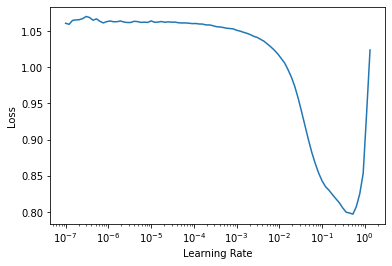

In [ ]:
lr_min, lr_steep = learn_spec.lr_find() 

I replot the LR Finder plot to find the steepest slope for maximum optimization. 

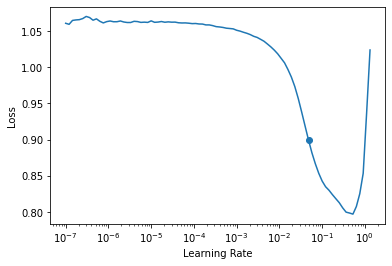

In [ ]:
learn_spec.recorder.plot_lr_find()
plt.scatter(5e-2, .90) 

By calling `fine_tune`, I tune the existing DenseNet121 model. 

I intially tune the head of the model for 1 epoch. 

Post satisfaction with the accuracy, I unfreeze the model and train for 4 epochs till stagnation in accuracy is reached. 

In [ ]:
learn_spec.fine_tune(4, base_lr = 5e-2, freeze_epochs=1)  

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.051809,0.030149,0.991105,05:29


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.029768,0.029539,0.991993,06:31
1,0.020589,0.020315,0.994450,06:32
2,0.011764,0.009228,0.997146,06:31
3,0.008313,0.007627,0.997735,06:31


The accuracy is 99.77%. 

I then save the .pkl file of the learner. 

In [ ]:
learn_spec.export('spec.pkl')

In [ ]:
df_spec = predictions(learn_spec)

##Make Predicitions

In [ ]:
spec_inf = load_learner('/content/spec.pkl') 

Putting the model and dataset on the GPU to accelerate the time taken to predict.  

In [ ]:
spec_inf.model = spec_inf.model.cuda() #pushing model on GPU
spec_inf.dls.to('cuda'); #pushing dataset on GPU 

Make the predictions for test set

In [ ]:
df_spec_test = pred_test(spec_inf, spec_test_dls)

Make a dataframe for test, train and val set. 

In [ ]:
df_spec_all = pd.concat([df_spec, df_spec_test])

In [ ]:
df_spec_all.to_csv('spec.csv')

##Make Inferences 

In [ ]:
spec_pred = get_cats(df_spec_test.Pred) 

The accuracy on the test subset is

In [ ]:
acc(df_spec_test)

0.9622531089978054

The accuracy is 96.2% on the test set. 

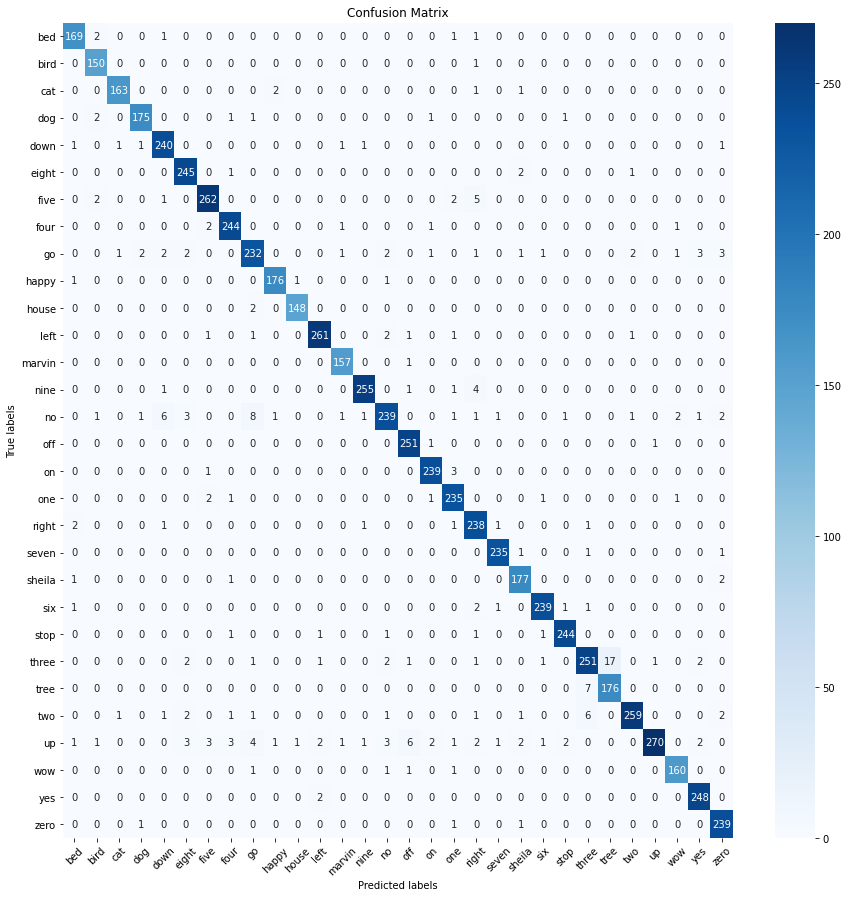

In [ ]:
ConfusionMatrix(spec_pred, true_test) 

#Mel-Spectogram 


We will first create a classifier to classify mel spectogram images into the correct words. 

Let's check if all the training images are here! 

In [ ]:
cats = os.listdir(path_mel)
sum = 0 
for cat in cats: 
  sum+= len(os.listdir(f'{path_mel}/{cat}'))
assert 64721== sum 

Since, the total number of examples is 64,721 which is equal to the number of files present in the `train_images` directory, we can be assured that we have all the training examples

##Create Image DataBunch 

Using the above functions, I create the DataBunch to pass through the CNN learner.

In [ ]:
validation = [path_mel/x for x in val]

In [ ]:
mel_spec = DataBlock(blocks = (ImageBlock, MultiCategoryBlock),
          get_items = get_image_files,
          get_y = label_func, 
          splitter = FuncSplitter(split), 
          item_tfms=Resize(224))  

In [ ]:
dls_mel = mel_spec.dataloaders(path_mel) 

In [ ]:
test_mel = dls_mel.test_dl([path_mel/t for t in test], with_labels=True) 

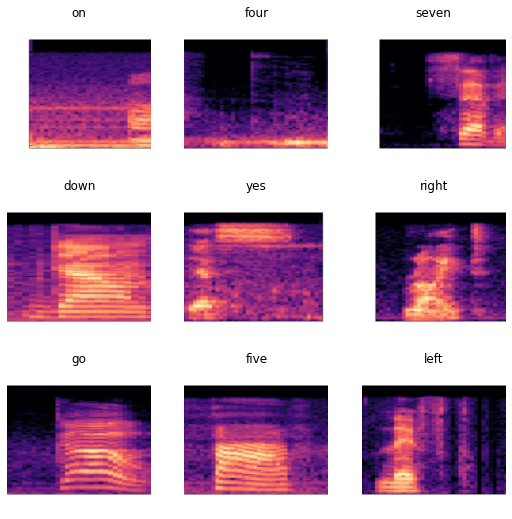

In [ ]:
dls_mel.show_batch() 

##Train the Classifier!

We pass a pretrained DenseNet121 architecture on ImageNet and `dls_spec` to our `cnn_learner` with the metrics set up for `accuracy`. 

In [ ]:
learn_mel = cnn_learner(dls_mel, models.densenet121, metrics = accuracy_multi)  

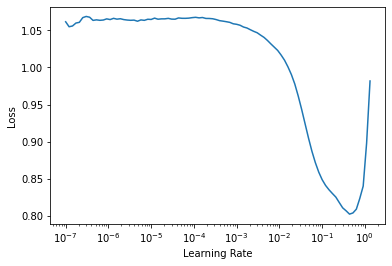

In [ ]:
lr_min, lr_steep = learn_mel.lr_find() 

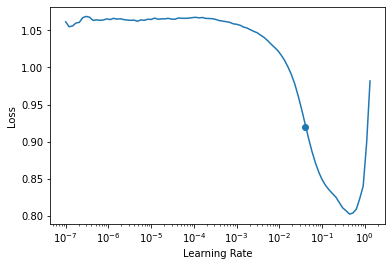

In [ ]:
learn_mel.recorder.plot_lr_find()
plt.scatter(4e-2,0.92) 

In [ ]:
learn_mel.fine_tune(4, base_lr = 4e-2, freeze_epochs = 1) 

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.042061,0.024403,0.992684,06:31


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.022492,0.020354,0.993807,07:46
1,0.017271,0.011566,0.996720,07:45
2,0.009932,0.014806,0.997420,07:46
3,0.007653,0.006940,0.997930,07:45


The model has an accuracy of 99.79% on validation dataset.

In [ ]:
learn_mel.export('mel.pkl') 

In [ ]:
df_mel_sub = predictions(learn_mel)

##Make Predicitions

In [ ]:
mel_inf = load_learner('/content/mel.pkl') 

Putting the model and dataset on the GPU! 

In [ ]:
mel_inf.model = mel_inf.model.cuda()
mel_inf.dls.to('cuda');

Now let's predict!

In [ ]:
df_mel_test = pred_test(mel_inf, test_mel)

In [ ]:
df_mel = pd.concat([df_mel_sub, df_mel_test])

In [ ]:
df_mel.to_csv('mel.csv')

In [ ]:
df_mel.head()

,Prob,Pred,True
0,0.999994,17,17
1,0.999830,17,17
2,0.999973,17,17
3,0.999906,17,17
4,0.999947,17,17


##Make Inferences 

Decode the predictions. 

In [ ]:
pred_mel = get_cats(df_mel_test.Pred.values)

The accuracy is 97.7% on the test set. 

In [ ]:
acc(df_mel_test)

0.977029992684711

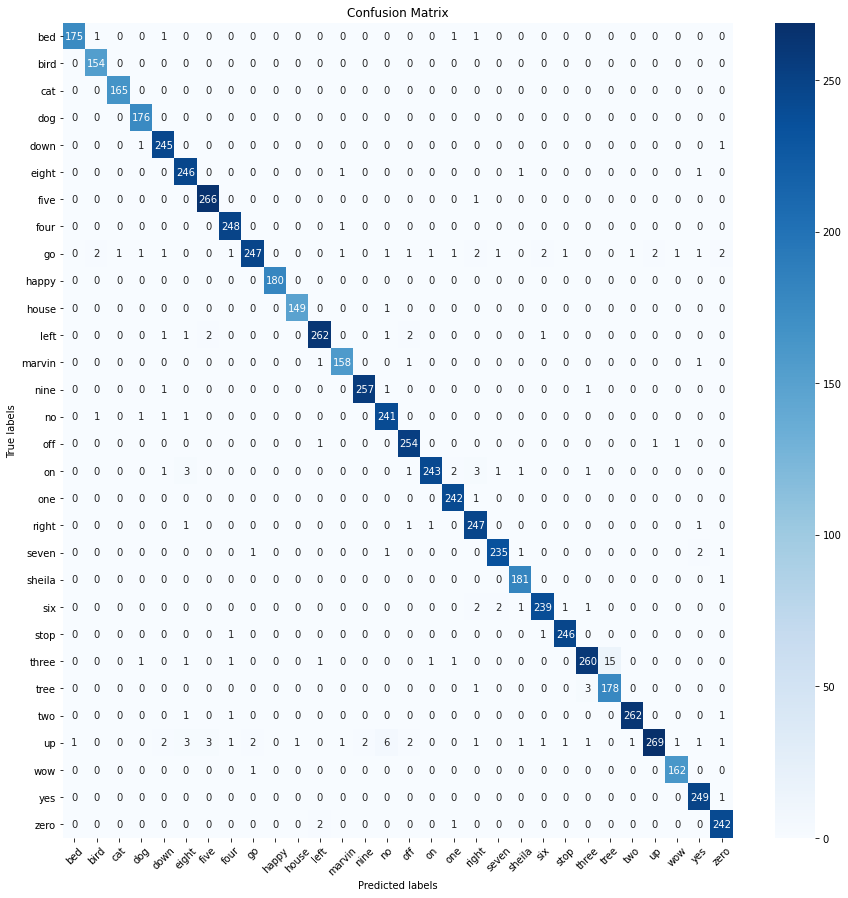

In [ ]:
ConfusionMatrix(pred_mel, true_test)

#MFCC Spectogram 


We will first create a classifier to classify MFCC spectogram images into the correct words. 

Let's check if all the training images are here! 

In [ ]:
cats = os.listdir(path_mfcc)
sum = 0 
for cat in cats: 
  sum+= len(os.listdir(path_mfcc/cat))
assert sum == len(total_files) 

Since, the total number of examples is 64,721 which is equal to the number of files present in the `train_images` directory, we can be assured that we have all the training examples

##Create Image DataBunch 

Using the above functions, I create the DataBunch to pass through the ResNet50 Architecture

In [ ]:
validation = [path_mfcc/x for x in val]

In [ ]:
mfcc_spec = DataBlock(blocks = (ImageBlock, MultiCategoryBlock),
          get_items = get_image_files,
          get_y = label_func, 
          splitter = FuncSplitter(split),
          item_tfms=Resize(224)) 

In [ ]:
dls_mfcc = mfcc_spec.dataloaders(path_mfcc) 

In [ ]:
test_mfcc = dls_mfcc.test_dl([path_mfcc/t for t in test], with_labels=True)

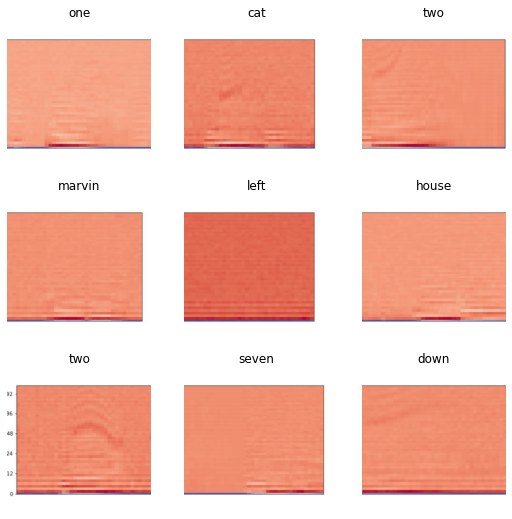

In [ ]:
dls_mfcc.show_batch() 

##Train the Classifier!

In [ ]:
learn_mfcc = cnn_learner(dls_mfcc, models.densenet121, metrics= accuracy_multi)  

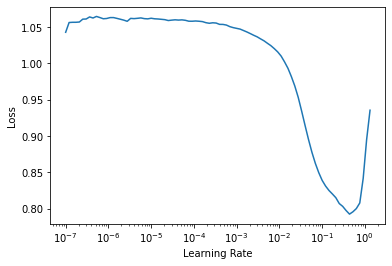

In [ ]:
lr_min, lr_steep = learn_mfcc.lr_find() 

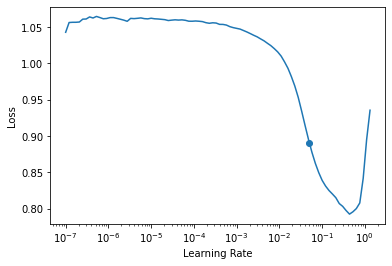

In [ ]:
learn_mfcc.recorder.plot_lr_find()
plt.scatter(5e-2, 0.89);

In [ ]:
learn_mfcc.fine_tune(4, base_lr = 5e-2, freeze_epochs=1) 

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.055949,0.126572,0.987982,06:29


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.032354,0.039620,0.988099,07:43
1,0.023250,0.030854,0.995386,07:43
2,0.013529,0.009590,0.996926,07:42
3,0.008683,0.008148,0.997435,07:42


The accuracy on the validation set is 99.74%

In [ ]:
 learn_mfcc.export('mfcc.pkl') 

In [ ]:
df_mfcc_sub = predictions(learn_mfcc) 

##Make Predicitions on Mini Test Set!

In [ ]:
mfcc_inf = load_learner('/content/mfcc.pkl') 

Putting the model and dataset on the GPU! 

In [ ]:
mfcc_inf.model = mfcc_inf.model.cuda()
mfcc_inf.dls.to('cuda'); 

Now let's predict!

In [ ]:
df_mfcc_test = pred_test(mfcc_inf, test_mfcc)

In [ ]:
df_mfcc = pd.concat([df_mfcc_sub, df_mfcc_test])

In [ ]:
df_mfcc.to_csv('mfcc.csv') 

In [ ]:
df_mfcc.head()

,Prob,Pred,True
0,0.999988,17,17
1,0.999985,17,17
2,0.999716,17,17
3,0.989873,17,17
4,0.999957,17,17


###Make Inferences 

In [ ]:
pred_mfcc = get_cats(df_mfcc_test.Pred.values)

In [ ]:
acc(df_mfcc_test)

0.9707388441843453

The test set has an accuracy of 97.07%

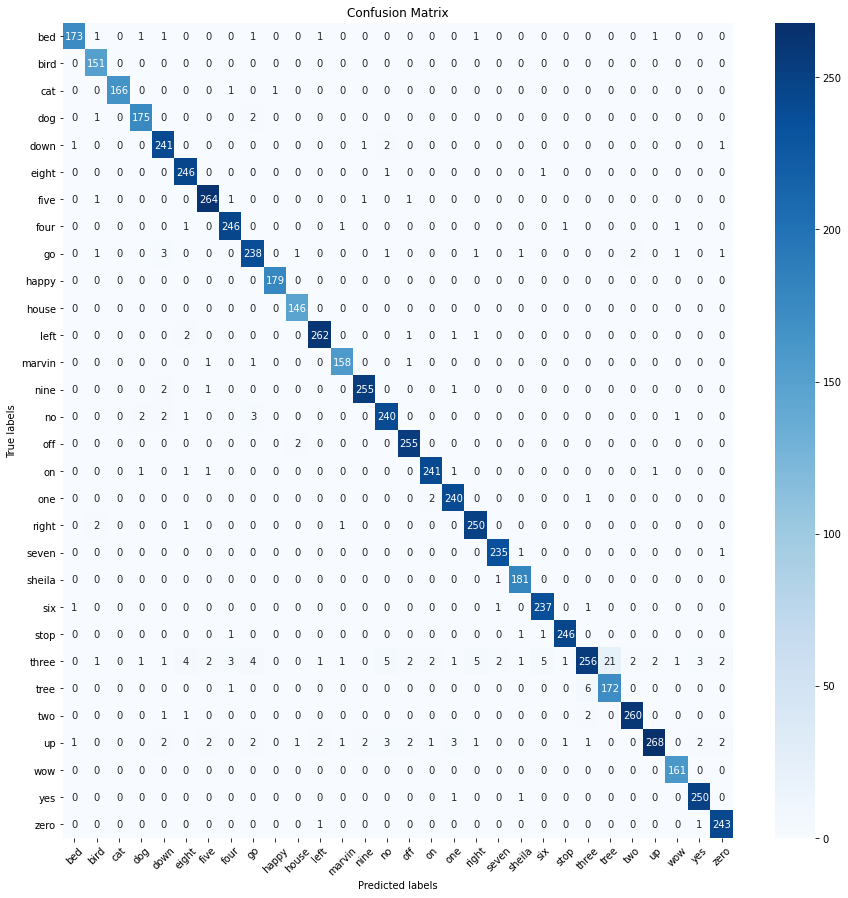

In [ ]:
ConfusionMatrix(pred_mfcc, true_test)

#Combine the DataFrames

#Test Set Predictions

Since, we are satified with the model created, let's get the predictions for all the test images!

##Load the Test Sets

We load the test sets for Spectogram, Mel Spectogram, and MFCC Spectogram here. 

In [ ]:
drive.flush_and_unmount()
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [ ]:
%%bash 
# unzip /content/gdrive/MyDrive/SpeechRecognition/test_spec.zip
# unzip /content/gdrive/MyDrive/SpeechRecognition/test_mel.zip
unzip /content/gdrive/MyDrive/SpeechRecognition/mfcc_test.zip

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



##Some Common Functions!

###Threshold Predictions
Through `thresh_test` we can retain the answers greater than the `n` i.e. the threshold. **bold text**

However, for values below the threshold, we append `silence` to the predictions. 

In [ ]:
cats = list(dls_spec.vocab)

In [ ]:
test_cats = ["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"] 

def predict(prob, pred):
  preds = []
  for pr, p in zip(prob,pred):
    if cats[p] in test_cats and pr>0.2: preds.append(cats[p])
    else: preds.append('silence')
  return preds

###Get files

Get all the test file names for any specific dataset dataset. 

In [ ]:
def get_test_files(path):
  return os.listdir(path)

###Define Paths
Let's define the path to our dataset. 

In [ ]:
path_spec_test = Path('/content/test_spec/')
path_mel_test = Path('/content/test_mel/') 
path_mfcc_test = Path('/content/test_mfcc/')

###Predict Test Set

In [ ]:
def pred_kaggle(learn, dl): 
  test = learn.get_preds(dl = dl)
  preds_max, preds = torch.max(test[0], dim = 1)
  return pd.DataFrame(list(zip(preds_max.tolist(), preds.tolist())),  columns = ['Prob','Pred'])

##Spectogram Test Set

Get the test set file names from `get_test_files`

In [ ]:
test_files = get_test_files(path_spec_test) 

Since, we know there are 158k+ files in the test set, we check to see if the test sets has same number of files.

In [ ]:
assert 158538 == len(test_files) 

The below cell will define the test names for all the images. 

In [ ]:
test_audio = [f'{t[:-3]}wav' for t in test_files] 

Create Kaggle test set dataloader!

In [ ]:
spec_test_dls = dls_spec.test_dl([path_spec_test/t for t in test_files]) 

###Make Predicitions

In [ ]:
spec_inf = load_learner('/content/spec.pkl') 

Putting the model and dataset on the GPU to accelerate the time taken to predict.  

In [ ]:
spec_inf.model = spec_inf.model.cuda() #pushing model on GPU 
spec_inf.dls.to('cuda'); #pushing dataset on GPU  

In [ ]:
spec_test = pred_kaggle(spec_inf, spec_test_dls)

In [ ]:
spec_test.head()

,Prob,Pred
0,0.999984,7
1,0.999998,22
2,0.084607,15
3,0.532737,1
4,1.000000,5


In [ ]:
spec_test.to_csv('spec_test.csv')

###Make Inference

In [ ]:
preds_cat = predict(spec_test.Prob,spec_test.Pred)
spec_sub = pd.DataFrame(list(zip(test_audio, preds_cat)), columns = ['fname', 'label']).set_index('fname')

In [ ]:
spec_sub.to_csv('spec_sub.csv')

In [ ]:
!rm -r test_spec

##Mel Spectogram Test Set

Get the test files and check if they are all present. 

In [ ]:
test_files = get_test_files(path_mel_test) 

In [ ]:
assert 158538 == len(test_files)

Since, we know there are 158k+ files in the test set, the test files for the spectogram is accurate.

In [ ]:
test_mel = dls_mel.test_dl([path_mel_test/t for t in test_files]) 

In [ ]:
test_audio = [f'{t[:-3]}wav' for t in test_files]

###Make Predicitions

In [ ]:
mel_inf = load_learner('/content/mel.pkl') 

Putting the model and dataset on the GPU to accelerate the time taken to predict.  

In [ ]:
mel_inf.model = mel_inf.model.cuda() #pushing model on GPU 
mel_inf.dls.to('cuda'); #pushing dataset on GPU 

In [ ]:
mel_test = pred_kaggle(mel_inf, test_mel)

In [ ]:
mel_test.to_csv('mel_test.csv')

In [ ]:
mel_test.head()

,Prob,Pred
0,0.999866,7
1,0.999999,22
2,0.118590,29
3,0.270856,7
4,1.000000,5


###Make Inference

In [ ]:
preds_cat = predict(mel_test.Prob,mel_test.Pred)
mel_sub = pd.DataFrame(list(zip(test_audio, preds_cat)), columns = ['fname', 'label']).set_index('fname')

In [ ]:
mel_sub.to_csv('mel_sub.csv')

In [ ]:
!rm -r test_mel

##MFCC Test Set

Get path for the dataset

In [ ]:
test_files = get_test_files(path_mfcc_test) 

In [ ]:
assert 158538 == len(test_files) 

Since, we know there are 158k+ files in the test set, the test files for the spectogram is accurate.

In [ ]:
test_mfcc = dls_mfcc.test_dl([path_mfcc_test/t for t in test_files])  

In [ ]:
test_audio = [f'{t[:-3]}wav' for t in test_files] 

###Make Predicitions

In [ ]:
mfcc_inf = load_learner('/content/mfcc.pkl')  

Putting the model and dataset on the GPU to accelerate the time taken to predict.  

In [ ]:
mfcc_inf.model = mfcc_inf.model.cuda() #pushing model on GPU 
mfcc_inf.dls.to('cuda'); #pushing dataset on GPU 

In [ ]:
mfcc_test =  pred_kaggle(mfcc_inf, test_mfcc)

In [ ]:
mfcc_test.to_csv('mfcc_test.csv')

In [ ]:
mfcc_test.head()

,Prob,Pred
0,0.949510,7
1,0.999937,22
2,0.070162,23
3,0.362049,1
4,0.999983,5


###Make Inference

In [ ]:
preds_cat = predict(mfcc_test.Prob,mfcc_test.Pred)
mfcc_sub = pd.DataFrame(list(zip(test_audio, preds_cat)), columns = ['fname', 'label']).set_index('fname')

In [ ]:
mfcc_sub.to_csv('mfcc_sub.csv')

In [ ]:
!rm -r test_mfcc_spec
!rm -r mfcc_train 

#Combine Predictions

##Using Mode

In [ ]:
df = pd.read_csv('/content/combined_DN.csv', index_col = 'fname') 

In [ ]:
df.shape

(158538, 3)

In [ ]:
preds = []
for row in df.itertuples():
  vals, counts = np.unique(np.array([row.label1, row.label2, row.label3]), return_counts = True)
  if len(vals)<= 2: preds.append(vals[np.argmax(counts)])
  else: preds.append('silence')

In [ ]:
df = pd.DataFrame(list(zip(test_audio, preds)), columns = ['fname', 'label']).set_index('fname')
df.to_csv('predictions_DN.csv')

##Using Threshold

In [2]:
df = pd.concat([mfcc_test,mel_test,spec_test],axis = 1)
df.columns = ['Prob_mfcc','Pred_mfcc','Prob_mel','Pred_mel','Prob_spec','Pred_spec']
df.index = test_audio 

In [ ]:
columns = list(df.columns)

In [ ]:
df.head()

,Prob_mfcc,Pred_mfcc,Prob_mel,Pred_mel,Prob_spec,Pred_spec
clip_743d18f19.wav,0.949510,7,0.999866,7,0.999984,7
clip_aab2971e3.wav,0.999937,22,0.999999,22,0.999998,22
clip_4b8b4a428.wav,0.070162,23,0.118590,29,0.084607,15
clip_465d3f8a6.wav,0.362049,1,0.270856,7,0.532737,1
clip_482f0a331.wav,0.999983,5,1.000000,5,1.000000,5


In [ ]:
predictions = []
for row in df.itertuples():
  preds = np.array([row.Pred_mfcc, row.Pred_mel, row.Pred_spec])
  thresh = np.array([row.Prob_mfcc, row.Prob_mel, row.Prob_spec])
  thresh_idx = np.argmax(thresh)

  if thresh[thresh_idx] > 0.2: 
    encode = preds[thresh_idx]
    if cats[encode] in test_cats: predictions.append(cats[preds[thresh_idx]])
    else: predictions.append('silence')
  else: predictions.append('silence')

In [ ]:
df_filter = pd.DataFrame(list(zip(test_audio, predictions)), columns = ['fname', 'label']).set_index('fname')

In [ ]:
df_filter.to_csv('pred_filter15.csv')